In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifierNB

In [3]:
df = pd.read_excel(r"C:\Pragati\Project\globalterrorismdb_0718dist.xlsx")

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,"Hindu, “Naxals Give Officials Tense Moments,” ...",NaN,NaN,ISVG,0.0,0.0,0.0,0.0
2,200910130011,2009,10,13,NaN,0,NaT,4,Afghanistan,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200910130013,2009,10,13,NaN,0,NaT,92,India,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200910130014,2009,10,13,NaN,0,NaT,92,India,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 141,Unnamed: 142,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147
count,9.395100e+04,93951.000000,93951.000000,93951.000000,93951.000000,93951.000000,93951.000000,93904.000000,9.390400e+04,93951.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
mean,2.013780e+11,2013.713202,6.542123,15.729167,0.061628,122.655767,8.098338,26.354141,2.139579e+06,1.482443,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
std,2.389164e+08,2.391855,3.396613,8.792769,0.240480,90.613116,2.331323,13.085351,6.556315e+08,6.611333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-42.884049,-1.578190e+02,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
25%,2.012093e+11,2012.000000,4.000000,8.000000,0.000000,92.000000,6.000000,15.715529,4.058603e+01,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
50%,2.014071e+11,2014.000000,7.000000,16.000000,0.000000,95.000000,9.000000,32.374802,4.473357e+01,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
75%,2.016013e+11,2016.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.199577,7.058193e+01,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,65.825119,2.009101e+11,2009.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93951 entries, 0 to 93950
Columns: 148 entries, eventid to Unnamed: 147
dtypes: datetime64[ns](1), float64(58), int64(21), object(68)
memory usage: 106.1+ MB


# Data Cleaning

In [7]:
df.isnull()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,False,True,True,False,False,False,False,False
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93946,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
93947,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
93948,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
93949,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [8]:
df.isnull().sum()

eventid             0
iyear               0
imonth              0
iday                0
approxdate      84772
                ...  
Unnamed: 143    93950
Unnamed: 144    93950
Unnamed: 145    93950
Unnamed: 146    93950
Unnamed: 147    93950
Length: 148, dtype: int64

In [9]:
df.keys()

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'Unnamed: 138', 'Unnamed: 139', 'Unnamed: 140', 'Unnamed: 141',
       'Unnamed: 142', 'Unnamed: 143', 'Unnamed: 144', 'Unnamed: 145',
       'Unnamed: 146', 'Unnamed: 147'],
      dtype='object', length=148)

In [10]:
df.shape

(93951, 148)

In [11]:
count_non_miss = df.count().head()
count_non_miss

eventid       93951
iyear         93951
imonth        93951
iday          93951
approxdate     9179
dtype: int64

In [12]:
mean_missing_percent=df.isnull().mean()*100
total_missing= df.isnull().sum().sort_values(ascending=False)

missing_data = pd.concat([total_missing,mean_missing_percent],axis=1,keys=['Total','%'])
missing_data

,Total,%
Unnamed: 139,93951,100.0
Unnamed: 135,93951,100.0
Unnamed: 136,93951,100.0
Unnamed: 137,93951,100.0
Unnamed: 142,93951,100.0
...,...,...
suicide,0,0.0
success,0,0.0
multiple,0,0.0
doubtterr,0,0.0


<AxesSubplot:>

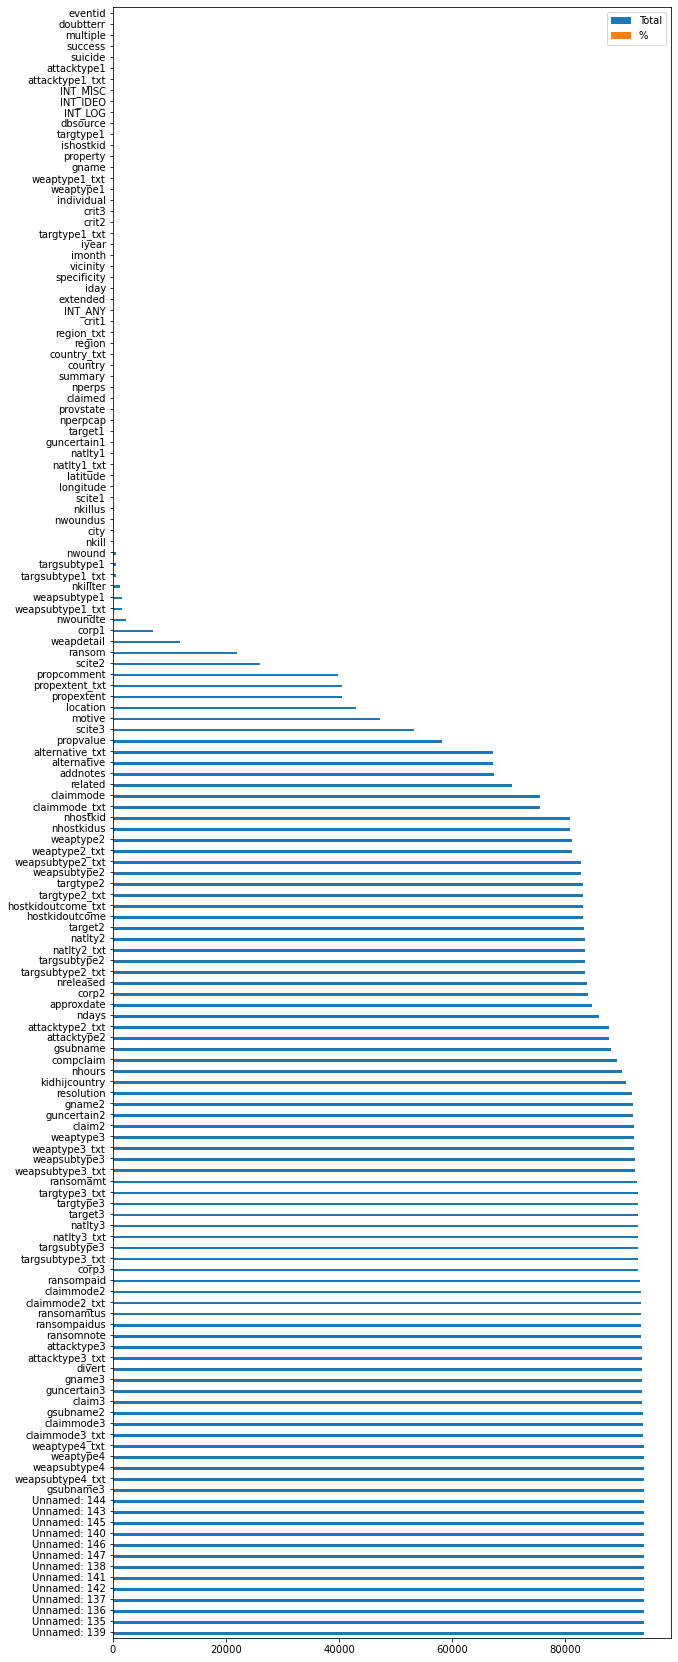

In [13]:
missing_data.plot(kind="barh",figsize=(10,30))

<AxesSubplot:>

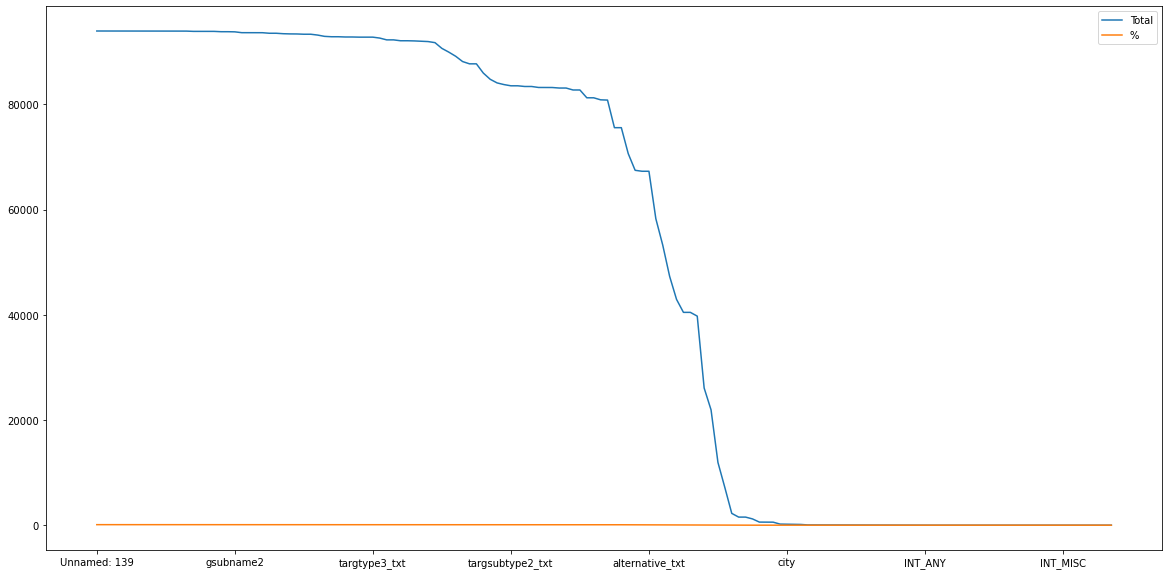

In [14]:
missing_data.plot(figsize=(20,10))

## Extracting Columns

In [15]:
dataset = pd.DataFrame(df,columns=["eventid","iyear","imonth","iday","country",
                                   "country_txt","region","region_txt","provstate",
                                  "city","location","success","attacktype1_txt",
                                   "targtype1_txt","targsubtype1_txt"])
dataset.head(5)

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,NaN,1,Assassination,Private Citizens & Property,Named Civilian
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,13,Dhanora,1,1,"Diplomatic Personnel (outside of embassy, cons..."
2,200910130011,2009,10,13,4,Afghanistan,6,South Asia,Zabul,Qalat,"The attack took place in Qalat, Xabol, Afghani...",1,Armed Assault,Government (General),Intelligence
3,200910130013,2009,10,13,92,India,6,South Asia,Bihar,Hussainganj,The attack took place in the Hussainganj area ...,1,Facility/Infrastructure Attack,Telecommunication,Telephone/Telegraph
4,200910130014,2009,10,13,92,India,6,South Asia,Bihar,Bandhu Bagicha,The attack took place in the Bandhu Bagicha ar...,1,Facility/Infrastructure Attack,Business,Embassy/Consulate


In [16]:
dataset.shape

(93951, 15)

In [17]:
mean_missing_percent1=dataset.isnull().mean()*100
total_missing1= dataset.isnull().sum().sort_values(ascending=False)

missing_data1 = pd.concat([total_missing1,mean_missing_percent1],axis=1,keys=['Total','%'])
missing_data1

,Total,%
location,42925,45.688710
targsubtype1_txt,587,0.624794
city,184,0.195847
provstate,2,0.002129
targtype1_txt,0,0.000000
attacktype1_txt,0,0.000000
success,0,0.000000
region_txt,0,0.000000
region,0,0.000000
country_txt,0,0.000000


# Fill Missing Values

In [18]:
dataset[["provstate"]] = dataset[["provstate"]].fillna(value="0")

In [19]:
dataset[["eventid","iyear","imonth","iday","country",
                                   "country_txt","region","region_txt",
                                  "city","location","success","attacktype1_txt",
                                   "targtype1_txt","targsubtype1_txt"]] = dataset[["eventid","iyear","imonth","iday","country",
                                   "country_txt","region","region_txt",
                                  "city","location","success","attacktype1_txt",
                                   "targtype1_txt","targsubtype1_txt"]] .fillna(value=0)
dataset.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,0,1,Assassination,Private Citizens & Property,Named Civilian
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,13,Dhanora,1,1,"Diplomatic Personnel (outside of embassy, cons..."
2,200910130011,2009,10,13,4,Afghanistan,6,South Asia,Zabul,Qalat,"The attack took place in Qalat, Xabol, Afghani...",1,Armed Assault,Government (General),Intelligence
3,200910130013,2009,10,13,92,India,6,South Asia,Bihar,Hussainganj,The attack took place in the Hussainganj area ...,1,Facility/Infrastructure Attack,Telecommunication,Telephone/Telegraph
4,200910130014,2009,10,13,92,India,6,South Asia,Bihar,Bandhu Bagicha,The attack took place in the Bandhu Bagicha ar...,1,Facility/Infrastructure Attack,Business,Embassy/Consulate


In [20]:
dataset.isnull()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
93947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
93948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
93949,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
dataset.isnull().sum()

eventid             0
iyear               0
imonth              0
iday                0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
location            0
success             0
attacktype1_txt     0
targtype1_txt       0
targsubtype1_txt    0
dtype: int64

**Data is ready to use.**

# Analayzing Specific Attack Type

In [22]:
assassination = df[df['attacktype1_txt'].str.contains("Assassination",na=False)]
assassination.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,200910130027,2009,10,13,NaN,0,NaT,153,Pakistan,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,200910130029,2009,10,13,NaN,0,NaT,95,Iraq,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,200910160013,2009,10,16,NaN,0,NaT,95,Iraq,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,200910210018,2009,10,21,NaN,0,NaT,19,Bangladesh,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
assassination.shape

(5824, 148)

# Analyzing Places

In [24]:
assassination.groupby("country_txt").size().sort_values(ascending=False)

country_txt
Iraq           977
Afghanistan    852
Pakistan       786
Philippines    599
Somalia        421
              ... 
Ireland          1
Ghana            1
Gabon            1
Denmark          1
Ivory Coast      1
Length: 95, dtype: int64

<AxesSubplot:ylabel='country_txt'>

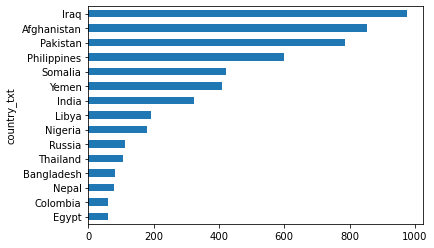

In [25]:
co=sns.color_palette("Spectral", as_cmap=True)
assassination.groupby("country_txt").size().sort_values(ascending=False).head(15).sort_values().plot(kind='barh')

**The five countries with the highest impact from terrorism as measured by the GTI are Iraq, Afghanistan, Nigeria,
Pakistan and Syria attack.**

In [26]:
assassination.groupby("region_txt").size().sort_values(ascending=False)

region_txt
South Asia                     2129
Middle East & North Africa     1798
Sub-Saharan Africa              828
Southeast Asia                  729
Eastern Europe                  155
South America                    92
Western Europe                   32
North America                    31
Central Asia                     15
Central America & Caribbean      12
East Asia                         3
dtype: int64

<AxesSubplot:ylabel='region_txt'>

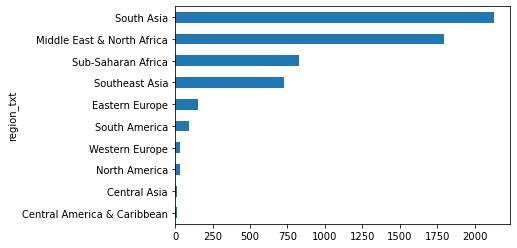

In [27]:
assassination.groupby("region_txt").size().sort_values(ascending=False).head(10).sort_values().plot(kind="barh")

**The ten most affected countries relative to the size of their economy are all conflict-affected states in the Middle East and
North Africa, sub-Saharan Africa and South Asia regions.**

<AxesSubplot:ylabel='imonth'>

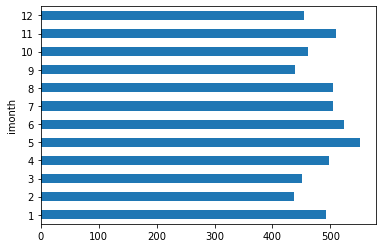

In [28]:
assassination.groupby("imonth").size().plot(kind="barh")

<AxesSubplot:xlabel='imonth', ylabel='count'>

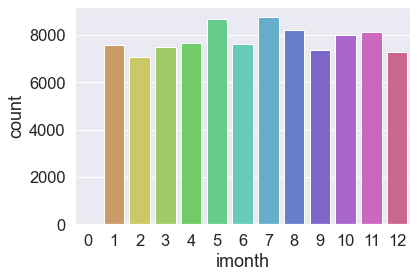

In [75]:
sns.countplot(x=df["imonth"],data=df,palette='hls')

**There are not much variations for the monthly attacks. But 5th and 7th month 
has highest number of attacks.**

In [30]:
import warnings 
warnings.filterwarnings("ignore")

In [31]:
X = df.iloc[:,0:12]
Y = df.iloc[:,12]

In [32]:
X

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal
2,200910130011,2009,10,13,NaN,0,NaT,4,Afghanistan,6,South Asia,Zabul
3,200910130013,2009,10,13,NaN,0,NaT,92,India,6,South Asia,Bihar
4,200910130014,2009,10,13,NaN,0,NaT,92,India,6,South Asia,Bihar
...,...,...,...,...,...,...,...,...,...,...,...,...
93946,200910130004,2009,10,13,NaN,0,NaT,45,Colombia,3,South America,Norte de Santander
93947,200910130005,2009,10,13,NaN,0,NaT,45,Colombia,3,South America,Norte de Santander
93948,200910130007,2009,10,13,NaN,0,NaT,205,Thailand,5,Southeast Asia,Pattani
93949,200910130008,2009,10,13,NaN,0,NaT,205,Thailand,5,Southeast Asia,Pattani


In [33]:
Y

0         Santo Domingo
1           Mexico city
2                 Qalat
3           Hussainganj
4        Bandhu Bagicha
              ...      
93946              Tibu
93947              Tibu
93948         Nong Chik
93949              Mayo
93950        Mayurbhanj
Name: city, Length: 93951, dtype: object

# Save clean data to excel/csv

In [34]:
dataset.to_excel('saved1.xlsx')

In [35]:
dataset.to_excel("output.xlsx",
             sheet_name='Sheet_name_1') 

In [36]:
dataset.to_csv('raw_data2.csv', index=False)

# Analysis

array([[<AxesSubplot:title={'center':'eventid'}>,
        <AxesSubplot:title={'center':'iyear'}>],
       [<AxesSubplot:title={'center':'imonth'}>,
        <AxesSubplot:title={'center':'iday'}>],
       [<AxesSubplot:title={'center':'country'}>,
        <AxesSubplot:title={'center':'region'}>]], dtype=object)

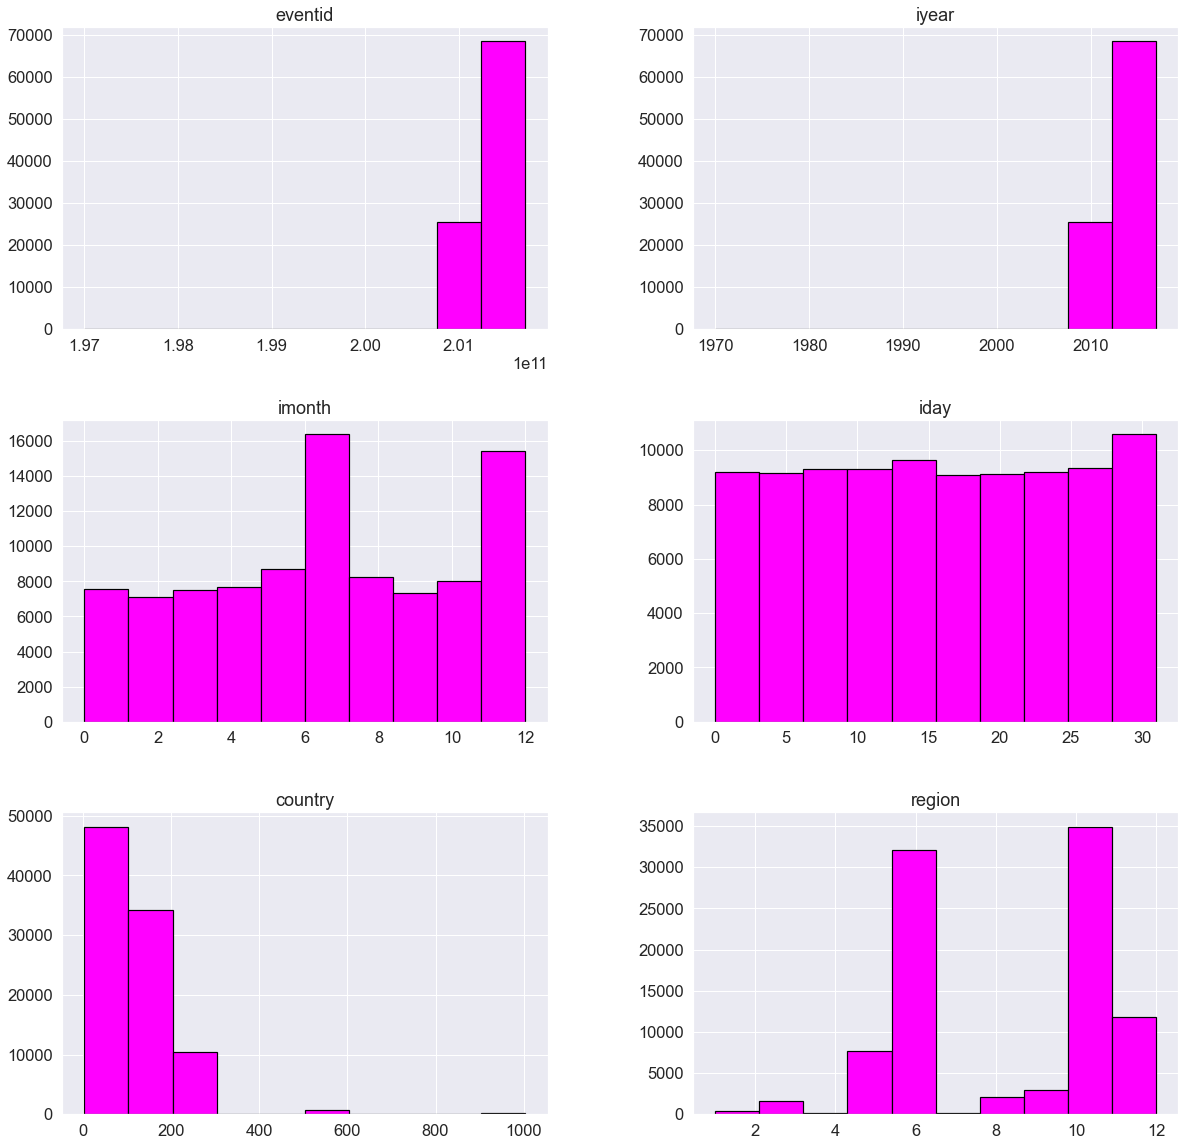

In [38]:
dataset.hist(color='magenta',edgecolor='black', linewidth=1.2, figsize=(20, 20))

**After 2010 attacks are increased.**

In [70]:
df['targtype1_txt'].value_counts()

Private Citizens & Property       25476
Military                          16509
Police                            13996
Government (General)               9781
Business                           7248
Unknown                            4907
Religious Figures/Institutions     2495
Educational Institution            2449
Transportation                     2333
Terrorists/Non-State Militia       2088
Utilities                          1932
Journalists & Media                1122
Violent Political Party            1045
Government (Diplomatic)             930
NGO                                 494
Telecommunication                   472
Airports & Aircraft                 253
Food or Water Supply                118
Other                                99
Maritime                             99
Tourists                             90
Abortion Related                     14
1                                     1
Name: targtype1_txt, dtype: int64

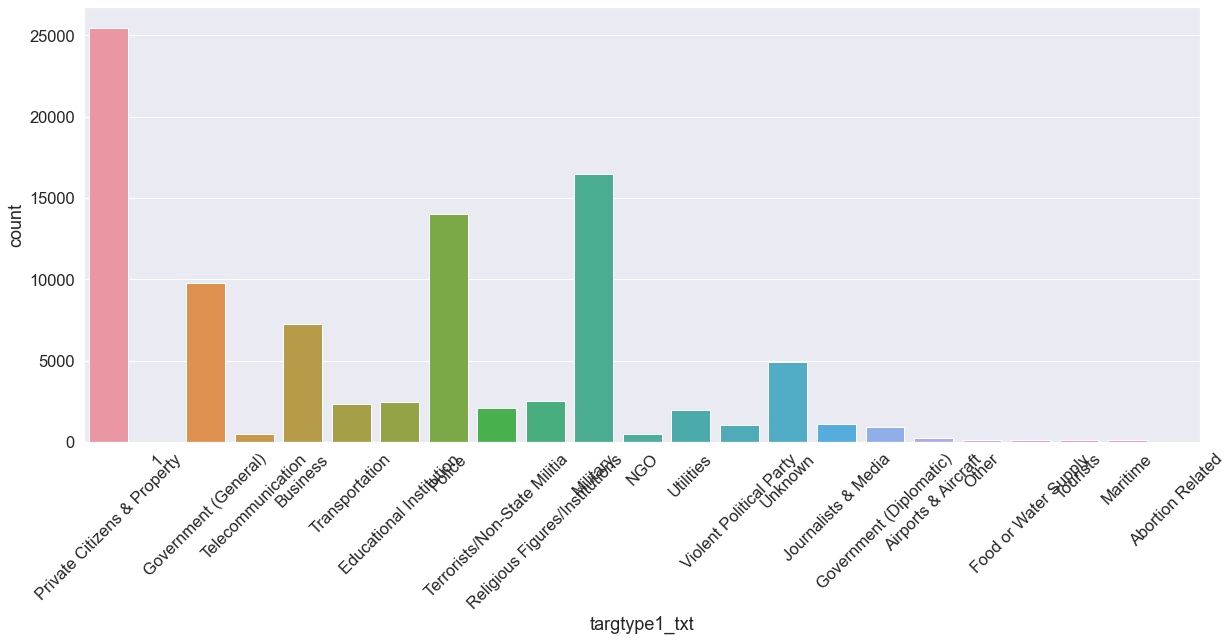

In [67]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.countplot(x=df['targtype1_txt'])
sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

**Private citizens and property is the group facing the highest number of deaths from terrorist attacks.**

In [39]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'location', 'success',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt'],
      dtype='object')

In [40]:
dataset['targsubtype1_txt'].value_counts()

Unnamed Civilian/Unspecified                               8299
Police Security Forces/Officers                            6240
Military Personnel (soldiers, troops, officers, forces)    5741
Village/City/Town/Suburb                                   3969
Government Personnel (excluding police, military)          3871
                                                           ... 
Other Facility                                               11
Internet Infrastructure                                      10
Royalty                                                       9
Tourism Travel Agency                                         3
Personnel                                                     1
Name: targsubtype1_txt, Length: 113, dtype: int64

<AxesSubplot:xlabel='iyear', ylabel='count'>

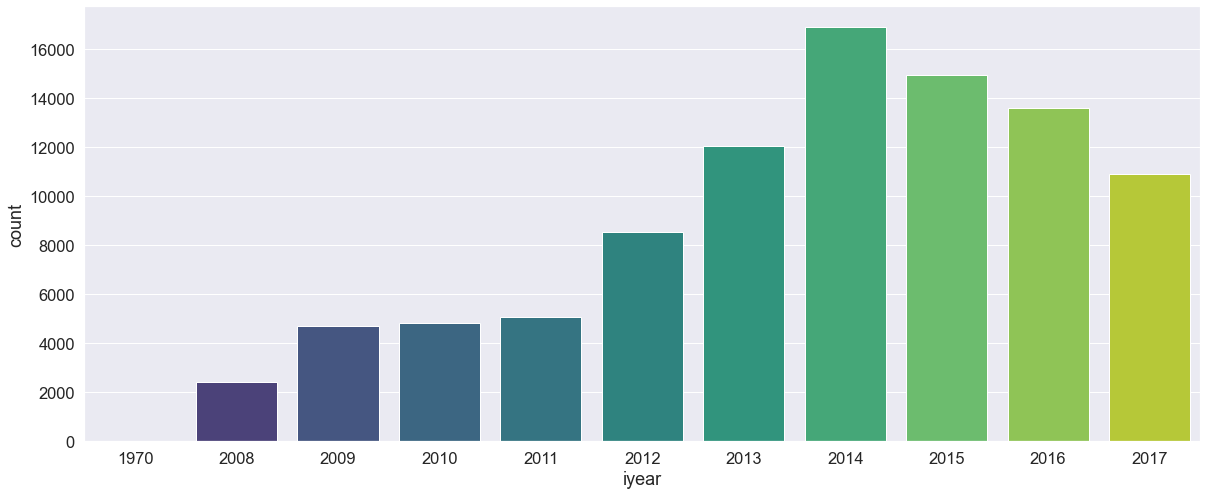

In [68]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['iyear'],palette='viridis')

**Of the last 16 years, the worst year for terrorism was 2014.**

In [43]:
month = dataset.groupby('targtype1_txt')['iyear'].value_counts(normalize=True)
month

targtype1_txt            iyear
1                        1970     1.000000
Abortion Related         2015     0.357143
                         2012     0.285714
                         2013     0.142857
                         2009     0.071429
                                    ...   
Violent Political Party  2016     0.076555
                         2010     0.044019
                         2009     0.042105
                         2011     0.023923
                         2008     0.022967
Name: iyear, Length: 218, dtype: float64

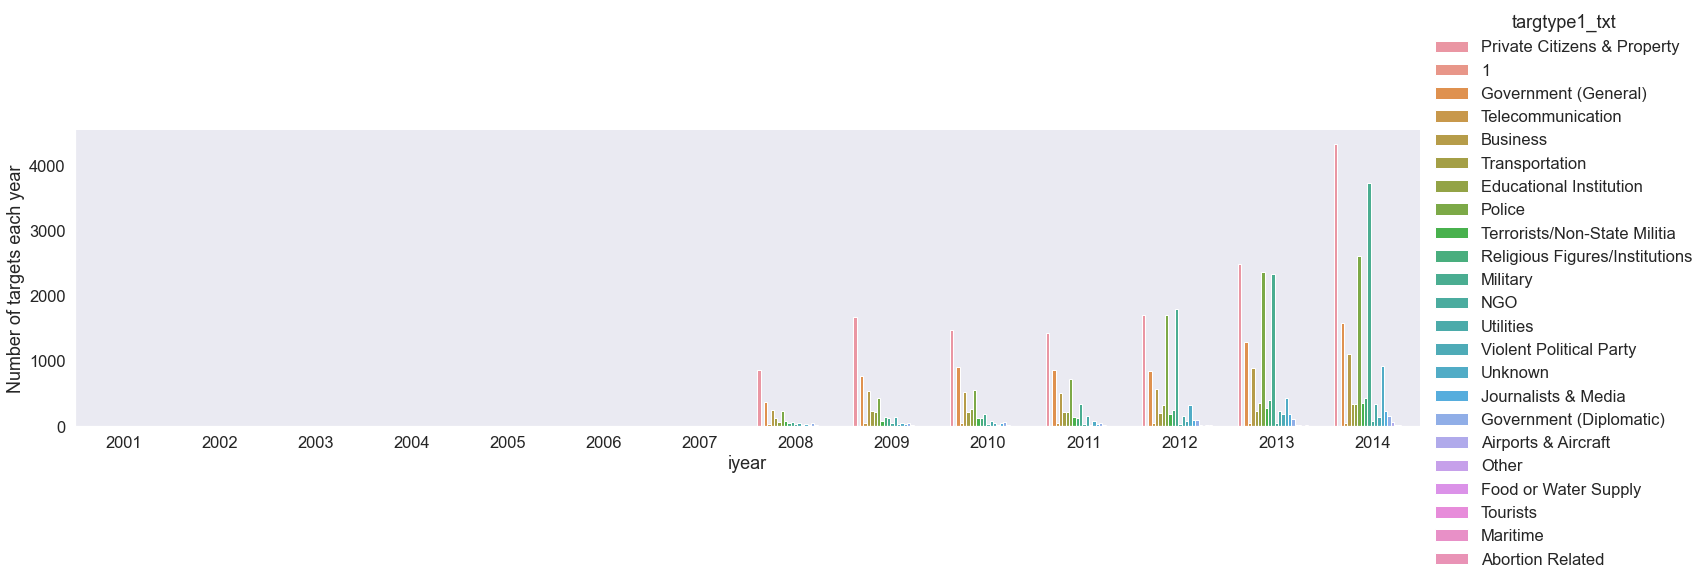

In [64]:
with sns.axes_style('dark'):
    g = sns.factorplot("iyear", data=df, aspect=4.0, kind='count',
                       hue='targtype1_txt', order=range(2001, 2015))
    g.set_ylabels('Number of targets each year')

**Number of deaths are increasing year by year because of different targets. Where 2014 includes maximum targets and 
shows top most affected year.**

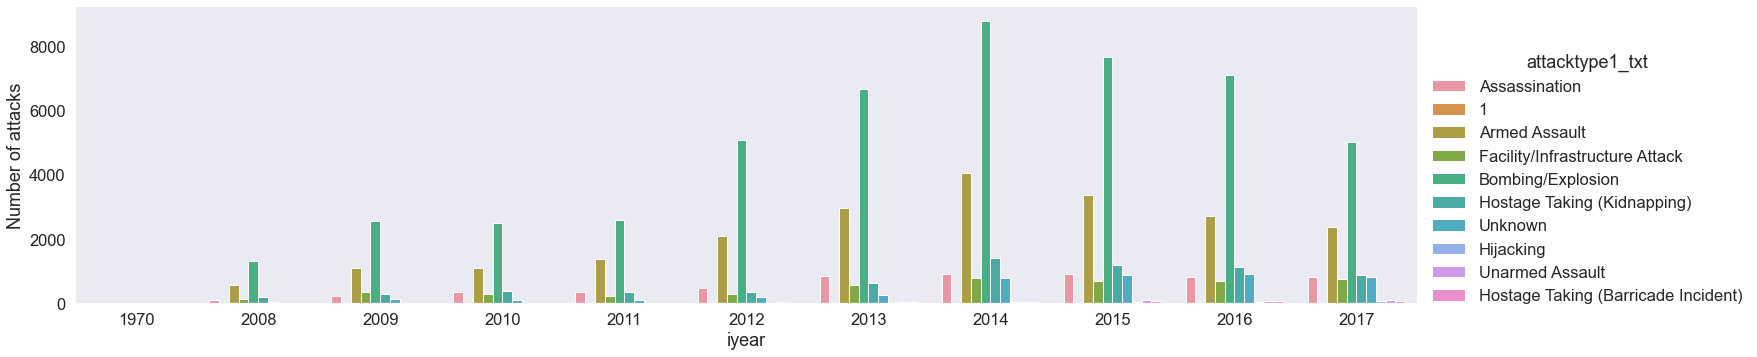

In [72]:
with sns.axes_style('dark'):
    g = sns.factorplot("iyear", data=df, aspect=4.0, kind='count',
                       hue='attacktype1_txt')
    g.set_ylabels('Number of attacks')

**Most of the attacks were by firearms with bombings and explosives making up a smaller percentage of terrorist attacks.**

In [46]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'location', 'success',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt'],
      dtype='object')

In [47]:
matrix = dataset[['iyear','region']]
matrix.corr()

,iyear,region
iyear,1.000000,0.131046
region,0.131046,1.000000


# One Hot Encoding

In [48]:
#Convert categoriCal values into numerical ones

In [49]:
dataset.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,0,1,Assassination,Private Citizens & Property,Named Civilian
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,13,Dhanora,1,1,"Diplomatic Personnel (outside of embassy, cons..."
2,200910130011,2009,10,13,4,Afghanistan,6,South Asia,Zabul,Qalat,"The attack took place in Qalat, Xabol, Afghani...",1,Armed Assault,Government (General),Intelligence
3,200910130013,2009,10,13,92,India,6,South Asia,Bihar,Hussainganj,The attack took place in the Hussainganj area ...,1,Facility/Infrastructure Attack,Telecommunication,Telephone/Telegraph
4,200910130014,2009,10,13,92,India,6,South Asia,Bihar,Bandhu Bagicha,The attack took place in the Bandhu Bagicha ar...,1,Facility/Infrastructure Attack,Business,Embassy/Consulate


In [50]:
dataset['success'] = dataset['success'].replace(['Dhanora'],1)

In [51]:
dataset['location'] = dataset['location'].replace([13],'Dhanora')

In [52]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [53]:
dataset["success"]=lb.fit_transform(dataset["success"])

In [54]:
dataset.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,0,1,Assassination,Private Citizens & Property,Named Civilian
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,Dhanora,1,1,1,"Diplomatic Personnel (outside of embassy, cons..."
2,200910130011,2009,10,13,4,Afghanistan,6,South Asia,Zabul,Qalat,"The attack took place in Qalat, Xabol, Afghani...",1,Armed Assault,Government (General),Intelligence
3,200910130013,2009,10,13,92,India,6,South Asia,Bihar,Hussainganj,The attack took place in the Hussainganj area ...,1,Facility/Infrastructure Attack,Telecommunication,Telephone/Telegraph
4,200910130014,2009,10,13,92,India,6,South Asia,Bihar,Bandhu Bagicha,The attack took place in the Bandhu Bagicha ar...,1,Facility/Infrastructure Attack,Business,Embassy/Consulate


In [55]:
dataset['country_txt']=lb.fit_transform(dataset['country_txt'])

In [56]:
dataset.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,197000000001,1970,7,2,58,36,2,Central America & Caribbean,0,Santo Domingo,0,1,Assassination,Private Citizens & Property,Named Civilian
1,197000000002,1970,0,0,130,89,1,North America,Federal,Mexico city,Dhanora,1,1,1,"Diplomatic Personnel (outside of embassy, cons..."
2,200910130011,2009,10,13,4,0,6,South Asia,Zabul,Qalat,"The attack took place in Qalat, Xabol, Afghani...",1,Armed Assault,Government (General),Intelligence
3,200910130013,2009,10,13,92,59,6,South Asia,Bihar,Hussainganj,The attack took place in the Hussainganj area ...,1,Facility/Infrastructure Attack,Telecommunication,Telephone/Telegraph
4,200910130014,2009,10,13,92,59,6,South Asia,Bihar,Bandhu Bagicha,The attack took place in the Bandhu Bagicha ar...,1,Facility/Infrastructure Attack,Business,Embassy/Consulate


In [57]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'location', 'success',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt'],
      dtype='object')

In [58]:
dataset.drop(['region_txt', 'provstate', 'city', 'location','attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt'],axis=1,inplace=True)

In [59]:
dataset.head()

,eventid,iyear,imonth,iday,country,country_txt,region,success
0,197000000001,1970,7,2,58,36,2,1
1,197000000002,1970,0,0,130,89,1,1
2,200910130011,2009,10,13,4,0,6,1
3,200910130013,2009,10,13,92,59,6,1
4,200910130014,2009,10,13,92,59,6,1


<AxesSubplot:xlabel='iday', ylabel='count'>

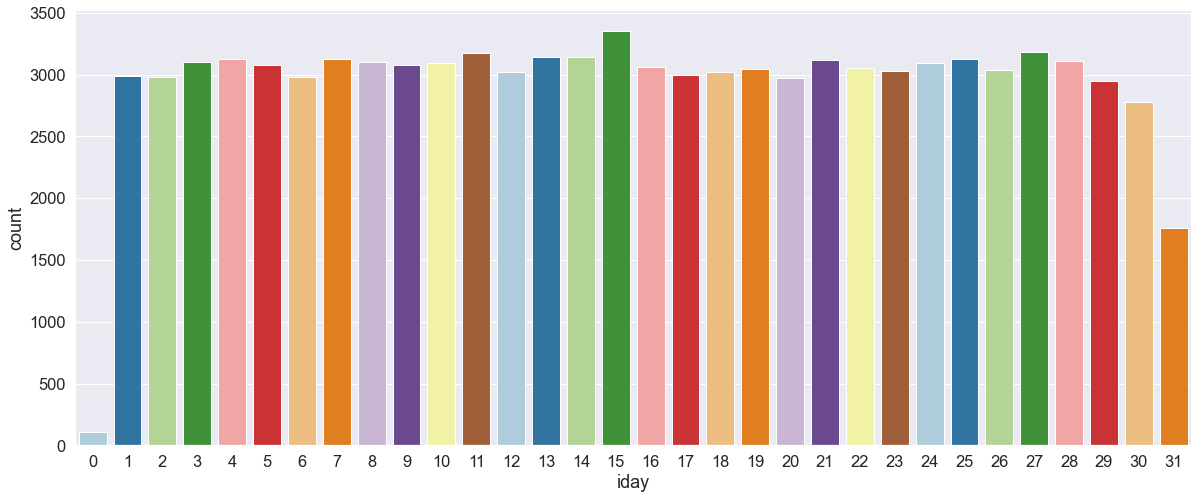

In [63]:
plt.figure(figsize=(20,8))
sns.countplot(x='iday',data=df,palette='Paired')

# Model Building

In [85]:
X = dataset.drop('success',axis=1)
y = dataset['success']

In [86]:
X.head()

,eventid,iyear,imonth,iday,country,country_txt,region
0,197000000001,1970,7,2,58,36,2
1,197000000002,1970,0,0,130,89,1
2,200910130011,2009,10,13,4,0,6
3,200910130013,2009,10,13,92,59,6
4,200910130014,2009,10,13,92,59,6


In [87]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: success, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [90]:
X_train.shape

(75160, 7)

In [91]:
X_test.shape

(18791, 7)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
model=LogisticRegression()

In [94]:
model.fit(X_train,y_train)

LogisticRegression()

In [95]:
y_pred=model.predict(X_test)

In [96]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_score(y_test,y_pred)*100

86.23277100739716

In [99]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [100]:
cross_val_logistic=cross_val_score(model,X,y,cv=k_fold,scoring='accuracy')

In [101]:
cross_val_logistic

array([0.86376457, 0.86120277, 0.86577967, 0.86072379, 0.85981905])

In [102]:
cross_val_logistic.mean()*100

86.22579695096526